Credits/Course URL: https://www.udemy.com/course/machinelearning/

## K-Nearest Neighbor (KNN) Classifier

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from mlxtend.plotting import plot_decision_regions

#### Reading the data

In [3]:
data = pd.read_csv(r'E:\Github\Datasets\Social_Network_Ads.csv')

In [4]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Data Exploration

In [5]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


#### Splitting the dataset

In [7]:
X = data.drop('Purchased', axis = 1).values
y = data['Purchased'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X_train[:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]], dtype=int64)

In [10]:
X_test[:5]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000],
       [   30, 79000],
       [   35, 50000]], dtype=int64)

In [11]:
X_train.shape, y_train.shape

((320, 2), (320,))

In [12]:
X_test.shape, y_test.shape

((80, 2), (80,))

#### Feature Scaling

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train[:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [16]:
X_test[:5]

array([[-0.79895082,  0.49460758],
       [-0.02126485, -0.57735906],
       [-0.31289709,  0.14694273],
       [-0.79895082,  0.26283101],
       [-0.31289709, -0.57735906]])

#### Building KNN Classifier

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [18]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred_train = knn_classifier.predict(X_train)
y_pred_test = knn_classifier.predict(X_test)

In [20]:
actual_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
actual_pred_df.head(7)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0


#### Classification Metrics on obtained results

In [21]:
print('\n **************** Classification Report - Training Data **************** \n')
print(classification_report(y_train, y_pred_train))


 **************** Classification Report - Training Data **************** 

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       199
           1       0.87      0.93      0.90       121

    accuracy                           0.92       320
   macro avg       0.91      0.92      0.91       320
weighted avg       0.92      0.92      0.92       320




 **************** Confusion Martix - Training Data **************** 



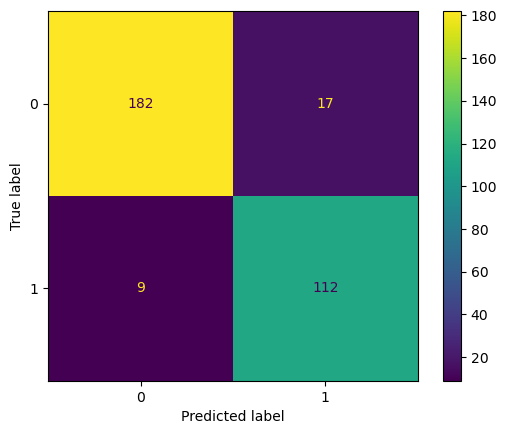

In [22]:
print('\n **************** Confusion Martix - Training Data **************** \n')
cm = confusion_matrix(y_train, y_pred_train, labels=knn_classifier.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

In [23]:
tn, fp, fn, tp = cm.ravel()

print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

True Negative: 182
False Positive: 17
False Negative: 9
True Positive: 112


In [24]:
print('\n **************** Classification Report - Training Data **************** \n')
print(classification_report(y_test, y_pred_test))


 **************** Classification Report - Training Data **************** 

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80




 **************** Confusion Martix - Training Data **************** 



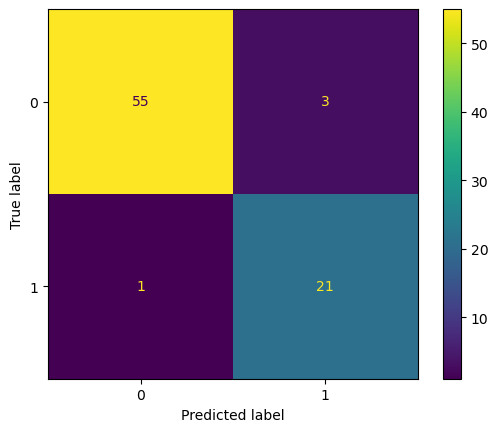

In [25]:
print('\n **************** Confusion Martix - Training Data **************** \n')
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

#### Improving the model

In [26]:
# Getting the training and test accuracies in a list for different values of K (of KNN Model)

train_acc_list = []
test_acc_list = []

for n in range(5, 101,5):
    
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    train_acc = round((accuracy_score(y_train, y_pred_train)*100),3)
    test_acc = round((accuracy_score(y_test, y_pred_test)*100),3)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

In [27]:
knn_accuracy_df  = pd.DataFrame((train_acc_list, test_acc_list), 
                                index = ['knn_train_accuracy', 'knn_test_accuracy'], 
                                columns = range(5, 101,5))

knn_accuracy_df 

,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
knn_train_accuracy,91.875,90.938,90.938,90.312,90.0,89.062,89.375,89.062,89.062,88.75,88.75,88.125,87.812,87.188,85.625,84.375,83.125,80.938,79.688,78.125
knn_test_accuracy,95.000,95.000,95.000,95.000,95.0,95.000,95.000,95.000,95.000,93.75,93.75,92.500,92.500,92.500,91.250,92.500,92.500,91.250,91.250,91.250


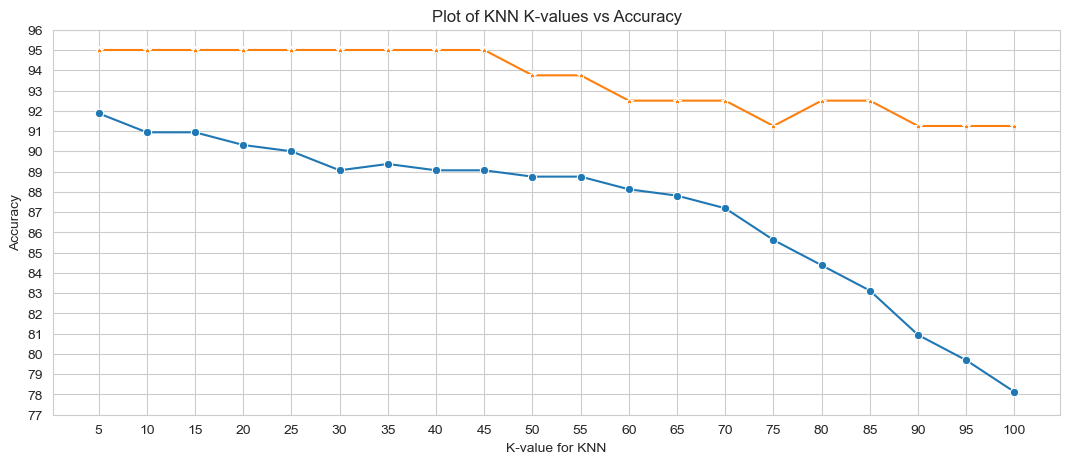

In [30]:
sns.set_style("whitegrid")

plt.figure(figsize=(13,5))
sns.lineplot(y = train_acc_list, x = range(5, 101,5), marker='o')
sns.lineplot(y = test_acc_list, x = range(5, 101,5), marker='*')
plt.xticks(range(5, 101,5))
plt.yticks(range(77,97,1))
plt.title("Plot of KNN K-values vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K-value for KNN")
plt.show()

In [31]:
# Getting the training and test accuracies in a list for different values of K (of KNN Model)

train_acc_list = []
test_acc_list = []

for n in range(1,11,1):
    
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    train_acc = round((accuracy_score(y_train, y_pred_train)*100),3)
    test_acc = round((accuracy_score(y_test, y_pred_test)*100),3)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

In [32]:
knn_accuracy_df  = pd.DataFrame((train_acc_list, test_acc_list), 
                                index = ['knn_train_accuracy', 'knn_test_accuracy'], 
                                columns = range(1,11,1))

knn_accuracy_df 

,1,2,3,4,5,6,7,8,9,10
knn_train_accuracy,99.688,92.188,91.562,90.938,91.875,90.938,90.938,90.938,91.25,90.938
knn_test_accuracy,88.750,88.750,95.000,95.000,95.000,95.000,95.000,95.000,95.00,95.000


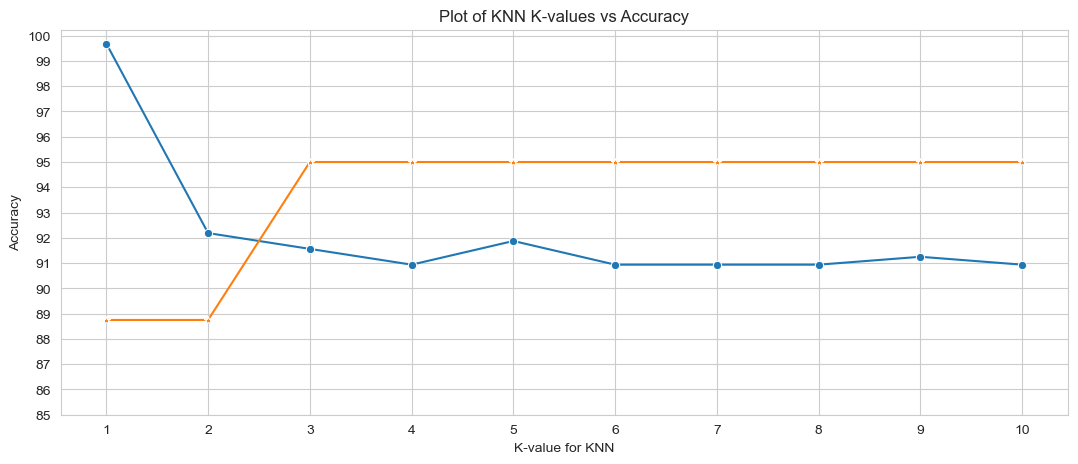

In [33]:
sns.set_style("whitegrid")

plt.figure(figsize=(13,5))
sns.lineplot(y = train_acc_list, x = range(1,11,1), marker='o')
sns.lineplot(y = test_acc_list, x = range(1,11,1), marker='*')
plt.xticks(range(1,11,1))
plt.yticks(range(85,101,1))
plt.title("Plot of KNN K-values vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K-value for KNN")
plt.show()

In [36]:
# re-running the classifier with k=5 (as per the graph above, 5 neighbours gives optimum accuracy for training and testing data)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

#### Plotting decision regions

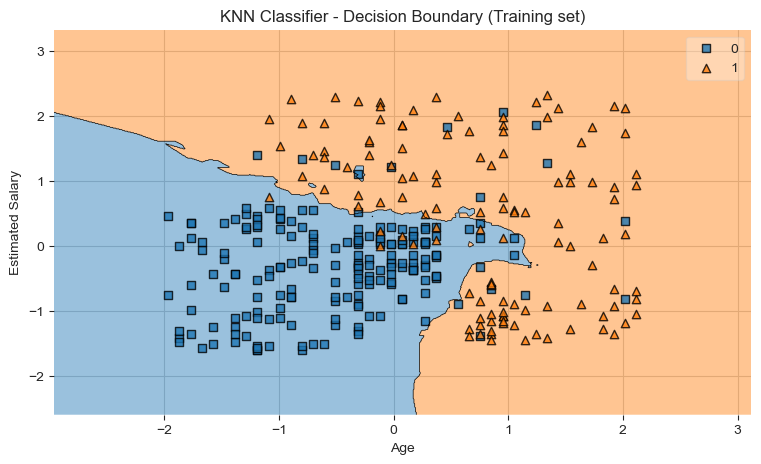

In [41]:
plt.figure(figsize=(9,5))

plot_decision_regions(X_train, y_train, 
                      clf=knn_classifier, 
                      legend=1, 
                      X_highlight=None)

# Adding axes annotations
plt.title('KNN Classifier - Decision Boundary (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
#plt.legend()
plt.show();

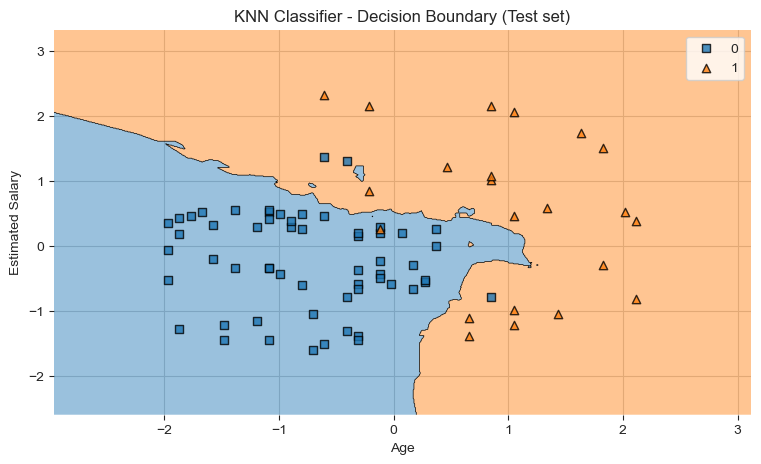

In [40]:
plt.figure(figsize=(9,5))

plot_decision_regions(X_test, y_test, 
                      clf=knn_classifier, 
                      legend=1, 
                      X_highlight=None)

plt.title('KNN Classifier - Decision Boundary (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()